# Case Study 1 : Collecting Data from Twitter

Due Date: 2/8/2021, **BEFORE the beginning of class at 11:00am**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Suggested Readings:** 
* Chapter 1 and Chapter 9 of the book "Mining the Social Web" can help a lot if you get stuck. 
* In fact, it is intentional that many of these questions can be answered directly from there (except for question 4)!
* The idea is to ease you into the case studies :-)

**Don't forget!**
* You will need to install the python-twitter library to access the Twitter API
 * pip install twitter


** NOTE **
* **Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost**.

# Problem 1 (20 points): Sampling Twitter Data with either Search or Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter API to sample a collection of tweets about this topic. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [ ]:
import twitter
import json
from collections import Counter
from prettytable import PrettyTable

In [ ]:
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Prof. Paffenroth has a developer account for the class.  He will provide the Twitter access tokens for
    # each team
    # See https://developer.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'oVek8jmhI4sz8SbKnT1e6UsIh'
    CONSUMER_SECRET ='3eGB6ip82K3XowIDEmz9JXIbRc2uFSlHvjPJ8Lmkf3HVIdlmhM'
    OAUTH_TOKEN = '571213367-H0r2WfySE7L4vgUJHv4YLW2vZGLa7TEPP7iWsTNu'
    OAUTH_TOKEN_SECRET = 'uKcYixkDRaCUvaP2oqH9a9fIaIB9nf4NKz32iqo2t7B7K'

    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

q = 'outage'

count = 100

# Import unquote to prevent URL encoding errors in next_results
from urllib.parse import unquote

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

for _ in range(5): #takes count 5 times, 100*5 = 500
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1)) 


### Report some statistics about the tweets you collected 

* The topic of interest: < INSERT YOUR TOPIC HERE>


* The total number of tweets collected:  < INSERT THE NUMBER HERE>

*-----------------------

# Problem 2 (20 points): Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#Katie/Bryson

#gather up all of the mentioned users and hashtags

hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

mentioned_user = [user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions']] #this collects all user mentions

#count how many times each hashtag is used and user is mentioned

for item in [hashtags, mentioned_user]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()
    
#format the data into a pretty table

for label, data in (('Hashtags', hashtags),
                    ('Mentioned Users', mentioned_user)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

# Problem 3 (20 points): Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [341]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import time
from prettytable import PrettyTable

# Get followers
friend_cursor = -1
follower_cursor = -1

user = "TweetWorcester"

number_of_users_to_collect = 3000

followers = []
friends = []
while number_of_users_to_collect != 0:
    try:
        count = 200
        if number_of_users_to_collect < 200:
            count = number_of_users_to_collect
        
        if follower_cursor != 0:
            res_follower = twitter_api.followers.list(screen_name=user, 
                                                      cursor=follower_cursor, 
                                                      count=count)
            
            followers += [{"screen_name": u["screen_name"], "id": u["id"]} for u in res_follower['users']]
            follower_cursor = res_follower["next_cursor"]
                        
        if friend_cursor != 0:            
            res_friends = twitter_api.friends.list(screen_name=user, 
                                                   cursor=friend_cursor, 
                                                   count=count)
            
            friends += [{"screen_name": u["screen_name"], "id": u["id"]}for u in res_friends['users']]
            friend_cursor = res_friends["next_cursor"]
        
        searches += 1
        number_of_users_to_collect -= count
    except twitter.api.TwitterHTTPError:
        rates = twitter_api.application.rate_limit_status()
        
        time_left = rates["resources"]["followers"]["/followers/list"]["reset"] - time.time()
        print("Waiting " + str(time_left) + " seconds")
        time.sleep(time_left + 2)
        print("Done waiting")
    


In [342]:
def generate_user_table(data, title, length=20):
    table = PrettyTable(["Screen Name", "Id"])
    table.title = title
    
    if len(data) < length:
        length = len(data)
        
    for i in range(length):
        row = data[i]
        table.add_row([row["screen_name"], row["id"]])
    
    return table

In [343]:
from prettytable import PrettyTable

friends_table  = generate_user_table(friends, "Friends")
followers_table  = generate_user_table(followers, "Followers")

print(friends_table)
print(followers_table)

+---------------------------------------+
|                Friends                |
+-----------------+---------------------+
|   Screen Name   |          Id         |
+-----------------+---------------------+
|   UMassMedCWM   |      183651111      |
|     JoeBiden    |        939091       |
|   acrawfordtv   |      198517622      |
|    JPJacobs22   |      2427321012     |
|     JB_Leary    | 1111629896231596040 |
|    pathare12    |      966554984      |
|  EricDicksonCEO | 1044599419264552960 |
|   AArriagaVet   |      484199294      |
|   508worcester  |      2995752323     |
|  MichaelHirsh4  | 1059098450556608513 |
|      CDCgov     |      146569971      |
|  ClanceyForWPS  | 1094275745457848320 |
|      WooSox     |      375064050      |
|   Wahlburgers   |      364345806      |
| WahlTruckBoston | 1012041292044554246 |
|  ErinKeatingTV  | 1156018737436401665 |
|  BostonMagazine |       14420767      |
|    TheWoohaha   |  935924457964736514 |
|     MassDOER    |       68696722

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [344]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

mutual = []
for u in followers:
    for r in friends:
        if u['id'] == r["id"]:
            mutual.append(u)
            
mutual_table  = generate_user_table(mutual, "Mutual")

print(mutual_table)



+-------------------------+
|          Mutual         |
+-------------+-----------+
| Screen Name |     Id    |
+-------------+-----------+
| acrawfordtv | 198517622 |
+-------------+-----------+


*------------------------

# Problem 4 (20 points): Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [316]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd
import numpy as np

q = 'outage OR apagón'

US_WOE_ID = 23424977
BOSTON_WOE_ID = 2367105
MANCHESTER_WOE_ID = 2444674

#q = "andrew"
# lat = "42.2743"
# long = "-71.8081"
# rad = "50mi"
# geocode = lat + "," + long + "," + rad
rates = twitter_api.application.rate_limit_status()
remaining_searches = rates["resources"]["search"]["/search/tweets"]["remaining"]
# remaining_searches = 5

statuses_to_get = 30000

current_max_id = 0
statuses = []
# count = 100
# See https://dev.twitter.com/docs/api/1.1/get/search/tweets
while statuses_to_get != 0:
    try:
        count = 100
        if statuses_to_get < 100:
            count = statuses_to_get

        if current_max_id == 0:
            search_results = twitter_api.search.tweets(q=q, count=count)
        else:
            search_results = twitter_api.search.tweets(q=q, count=count, max_id=current_max_id)

        current_max_id = search_results['statuses'][len(search_results['statuses'])-1]["id"]

        if len(search_results['statuses']) == 0:
            break
        statuses += search_results['statuses'][1:]
        statuses_to_get -= count
        
    except twitter.api.TwitterHTTPError:
        rates = twitter_api.application.rate_limit_status()
        
        time_left = rates["resources"]["search"]["/search/tweets"]["reset"] - time.time()
        print("Waiting " + str(time_left) + " seconds")
        time.sleep(time_left + 2)

    

Waiting 707.7733271121979 seconds


In [317]:
len(statuses)

29619

In [318]:
len(set([x["id"] for x in statuses]))

29619

In [319]:
rates = twitter_api.application.rate_limit_status()
remaining_searches = rates["resources"]["search"]["/search/tweets"]["remaining"]
remaining_searches

60

In [331]:
outages = {}
for i in range(len(statuses)):
    if statuses[i]["user"]["location"] and statuses[i]["user"]["location"].find('USA') == -1:
        if statuses[i]["user"]["location"].upper() in outages:
            outages[statuses[i]["user"]["location"].upper()]["time_stamp"].append(statuses[i]["created_at"])
            outages[statuses[i]["user"]["location"].upper()]["count"] += 1
        else:
            outages[statuses[i]["user"]["location"].upper()] = {
                "count": 1,
                "time_stamp": [statuses[i]["created_at"]]
            }

    
            
country_count = [[key, outages[key]["count"]] for key in outages.keys()]

df = pd.DataFrame(country_count, columns=["Location", "Count"]).sort_values(by="Count", ascending=False)

with open('outages.json', 'w') as outfile:
    json.dump(outages, outfile)

In [ ]:
outages["NEW YORK CITY"]["time_stamp"]

In [337]:
with open('outages.json') as json_file:
    data = json.load(json_file)


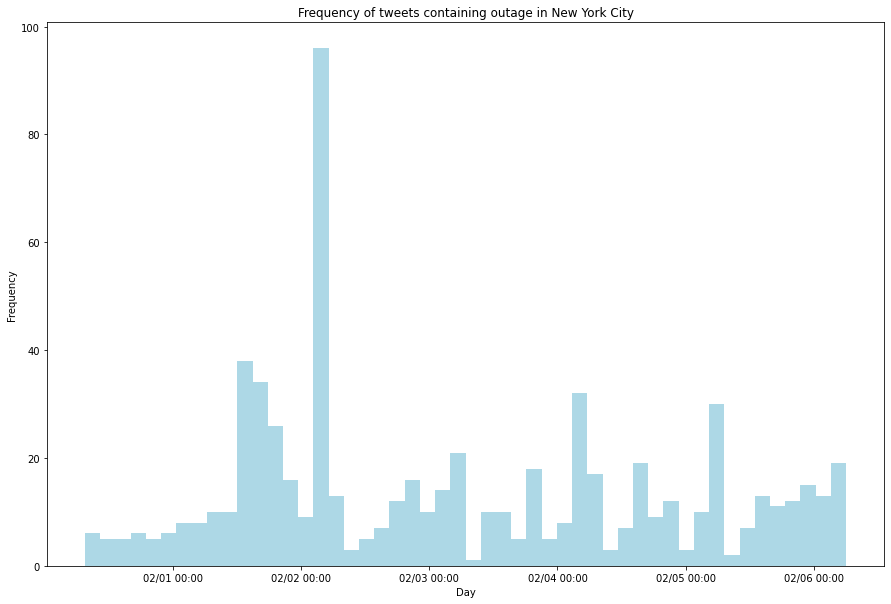

<Figure size 3600x720 with 0 Axes>

In [322]:
import matplotlib.dates as mdates

for key in outages.keys():
    outages[key]["time_stamp"] = [parse(x) for x in outages[key]["time_stamp"]]

dat = outages["NEW YORK CITY"]["time_stamp"]

fig, ax = plt.subplots(1,1, figsize=(15,10))
plt.figure(figsize=(50,10))
ax.hist(dat, bins=50, color='lightblue')
ax.set_ylabel("Frequency")
ax.set_xlabel("Day")
ax.set_title("Frequency of tweets containing outage in New York City")
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
plt.show()


In [250]:
df

,Location,Count
256,"NAIROBI, KENYA",512
27,NEW YORK CITY,334
21,"40 HERONMERE ROAD, 2016",207
4,"JOHANNESBURG, SOUTH AFRICA",205
38,VENEZUELA,205
...,...,...
2142,CORO,1
2144,EN ESTE GRAN PLANETA TIERRA.,1
2146,MIGUEL HIDALGO,1
2147,NEW BRUNSWICK,1


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

X = [x for x in outages["CHICAGO, IL"]["time_stamp"]]
df = pd.DataFrame(X)

In [184]:
df.to_csv("Chicago.csv")

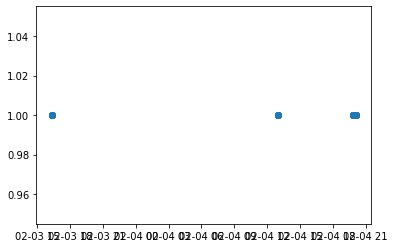

In [180]:
plt.scatter(X,Y)

In [135]:
statuses[0]["created_at"]

'Fri Feb 05 23:04:50 +0000 2021'

In [132]:
out = []

for i in statuses:
    if i["geo"]:
        out.append(i)
        
print(out)

[]


In [ ]:
statuses

In [128]:
df

,Location,Count
10,"Chicago, IL",20
0,"Michigan, USA",15
20,"Brooklyn, NY",15
51,Aberdeen,10
45,"New York, NY",10
...,...,...
29,st.Johns,5
30,"Newfoundland, Canada",5
31,Washington DC,5
32,Pittsburgh,5


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 15 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS3010 Case Study 1 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Totoal Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 20
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 20
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 20
    -----------------------------------
  
    -----------------------------------
    Question 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Come up with a business question and describe how Twitter data and a NoSQL database such as MongoDB call help you anser it.


---------------------------------------------------------------------------
**Slides (for 10 minutes of presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 


